In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-05-30 17:21:24--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.63.210.18, 2600:1406:4c00:2a6::317f, 2600:1406:4c00:299::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.63.210.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   148MB/s    in 5.5s    

2024-05-30 17:21:30 (142 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
!unzip /content/kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices('GPU'))

tf.Tensor(2056.0903, shape=(), dtype=float32)
[]


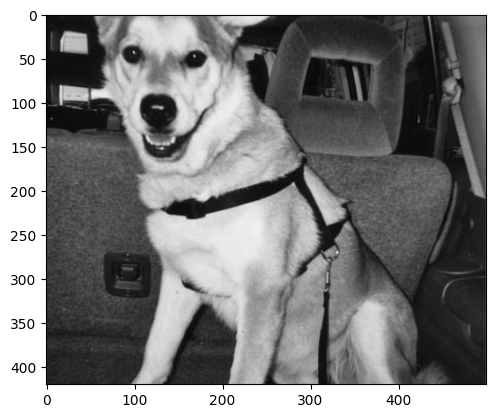

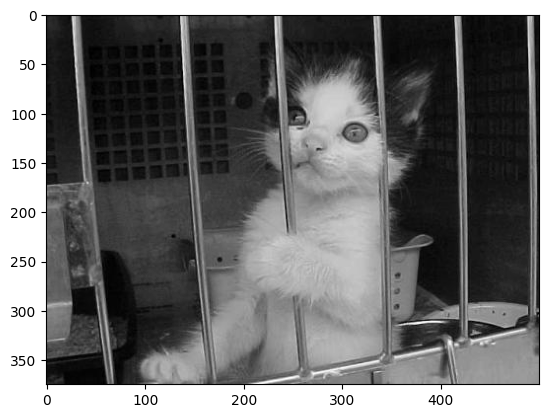

In [28]:
DATADIR = '/content/PetImages'
CATEGORIES = [ "Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break

In [29]:
print(img_array)

[[ 24  25  28 ...  15  15  11]
 [ 26  28  31 ...  19  20  17]
 [ 31  33  36 ...  21  24  21]
 ...
 [ 28  33  35 ... 147 146 145]
 [ 38  42  43 ... 146 145 144]
 [ 50  50  47 ... 145 145 144]]


In [17]:
print(img_array.shape)

(375, 500)


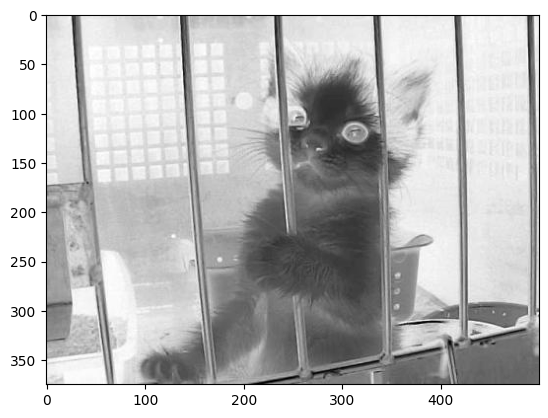

In [18]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(img_array, cmap='binary')

In [19]:
training_data = []

def create_training_data():
    for cate in CATEGORIES:
        path = os.path.join(DATADIR, cate)
        class_num = CATEGORIES.index(cate)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()



In [20]:
print(len(training_data))

24946


In [21]:
import random

random.shuffle(training_data)

In [22]:
for sample in training_data[:10]:
    print(f" Label:{sample[1]}   \n Data:{sample[0]}")

 Label:1   
 Data:[[158 152 151 ... 164 170 166]
 [158 154 153 ... 163 162 166]
 [162 155 149 ... 160 156 160]
 ...
 [173 166 165 ...  28  39  24]
 [175 171 168 ...  32  27  24]
 [170 172 166 ...  27  24  31]]
 Label:0   
 Data:[[ 34  37  83 ... 139 144 132]
 [ 39  37  85 ... 133 145  91]
 [ 37  33  85 ... 137 121 106]
 ...
 [ 63  70  68 ...  90  21  33]
 [ 68  73  61 ...  39  27  13]
 [ 63  69  40 ...  47  52  12]]
 Label:1   
 Data:[[151 155 156 ... 106  97  90]
 [153 158 161 ... 106  97  86]
 [158 154 159 ... 105  99  86]
 ...
 [192 189 178 ...  40  81  93]
 [199 183 179 ...  67 151  90]
 [185 194 182 ... 124 191 161]]
 Label:1   
 Data:[[ 74  83  86 ... 104 111 113]
 [ 80  91  98 ... 131 129 115]
 [ 88 105  84 ... 126 124 117]
 ...
 [114 108 119 ... 203 200 214]
 [108 116 115 ... 206 215 208]
 [132 132 139 ... 203 207 202]]
 Label:0   
 Data:[[254 254 254 ... 112 106 102]
 [254 254 254 ... 100  93  91]
 [125 170 254 ...  86  92  92]
 ...
 [207 207 209 ... 170 172 172]
 [204 203 207

In [23]:
X = []
y = []

In [24]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Here's what's happening:

np.array(X): This converts the input X into a NumPy array. NumPy arrays are a fundamental data structure in Python for numerical computations. They provide an efficient and flexible way to store and manipulate large datasets.

reshape(-1, IMG_SIZE, IMG_SIZE, 1): This reshapes the NumPy array into a new shape.

The new shape is specified by the arguments to the reshape method:

-1: This is a special value that tells NumPy to infer the size of this dimension automatically. It means that the size of this dimension will be calculated based on the total size of the array and the sizes of the other dimensions.
IMG_SIZE: This is the size of the second dimension.
IMG_SIZE: This is the size of the third dimension.
1: This is the size of the fourth dimension.
So, the resulting array will have four dimensions:

The first dimension (inferred by NumPy) will be the batch size, i.e., the number of images in the dataset.
The second and third dimensions will be the height and width of the images, respectively, which are both IMG_SIZE.
The fourth dimension will be the number of color channels in the images, which is 1 (i.e., grayscale images).
This reshaping is often used when preparing image data for training a convolutional neural network (CNN). The CNN expects the input data to have a specific shape, which is typically (batch_size, height, width, channels).

For example, if IMG_SIZE is 28, and X is a list of 1000 28x28 grayscale images, the resulting array X will have a shape of (1000, 28, 28, 1), which is suitable for training a CNN.

## Saving Data

In [25]:
import pickle

pickle_out = open("X.pickle", 'wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", 'wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [26]:
pickle_in = open("X.pickle", 'rb')
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", 'rb')
y = pickle.load(pickle_in)